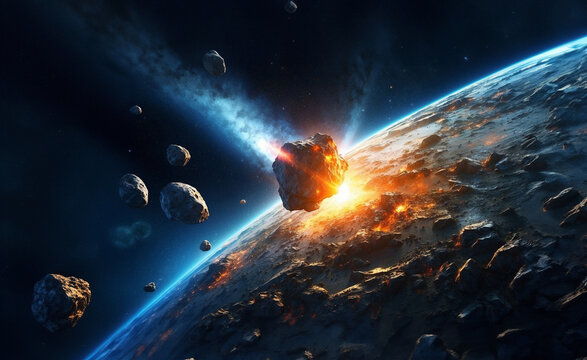

There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.

In [ ]:
# !pip install --upgrade numpy pandas matplotlib plotly seaborn imbalanced-learn scikit-learn xgboost


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ml_project_classification/neo.csv')


#Exploratory Data Analysis (EDA)


In [ ]:
print(df.head())


        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB
None


In [ ]:
print(df.describe())

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

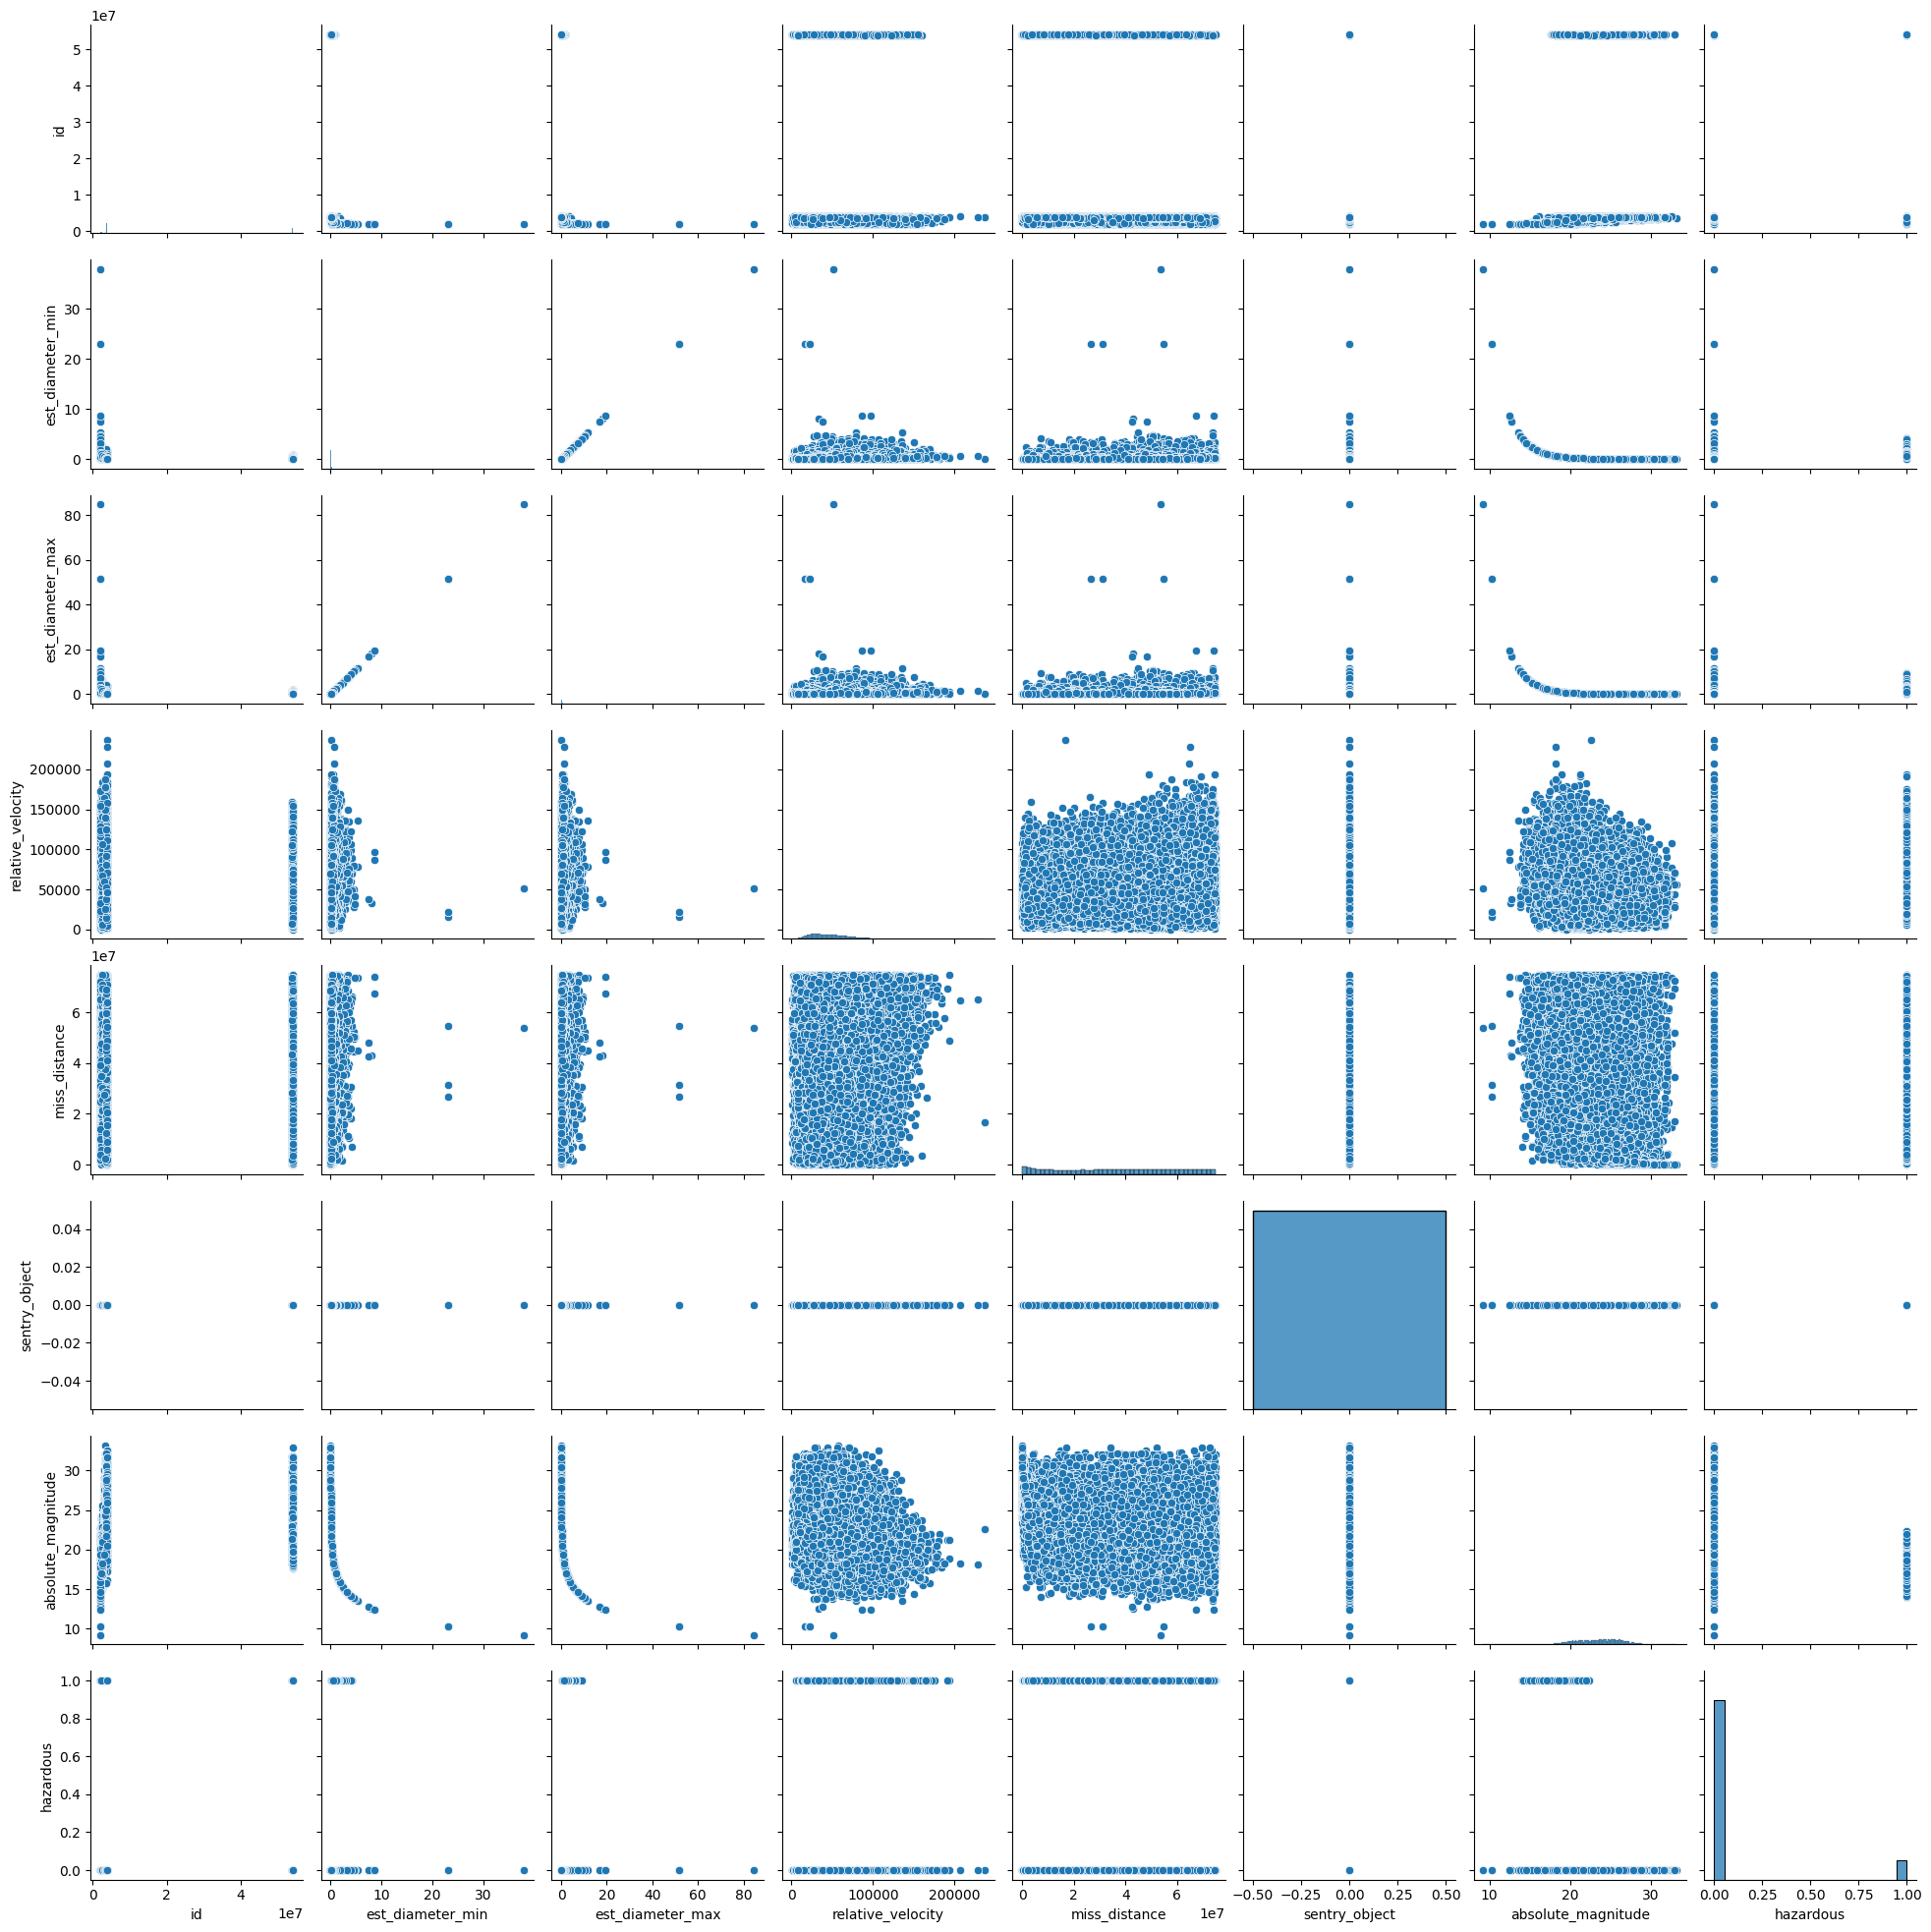

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


In [ ]:
print(df.isnull().sum())


id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


In [ ]:
df.drop(columns =['id','name', 'sentry_object', 'orbiting_body'], inplace = True)

In [ ]:
df.shape

(90836, 6)

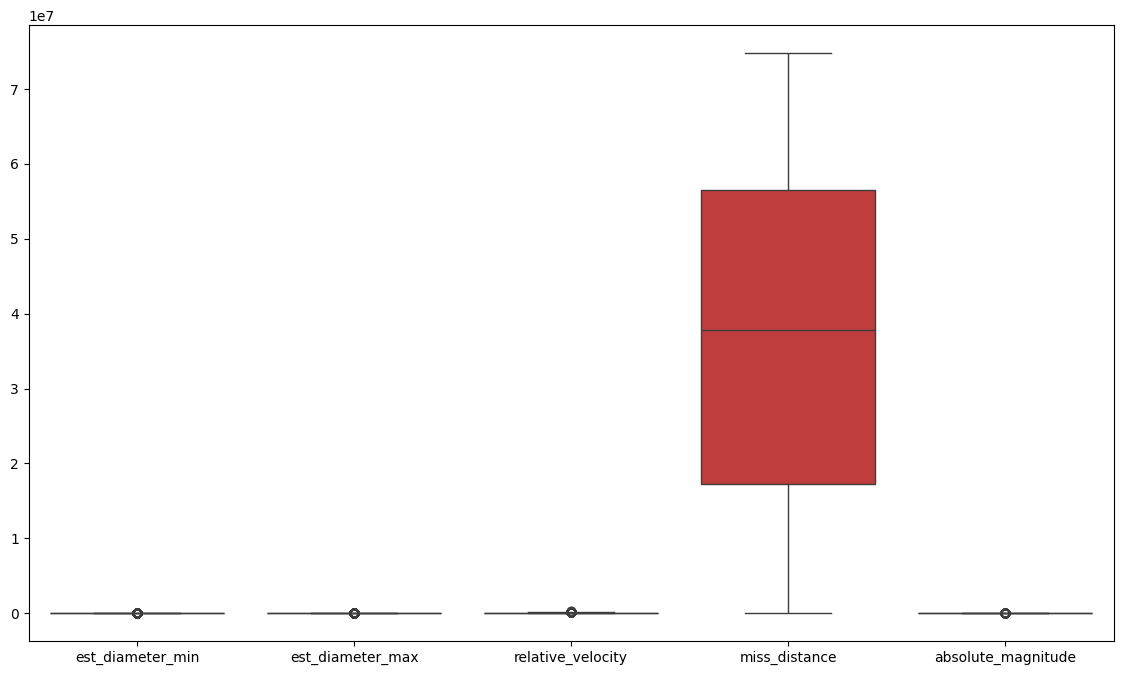

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to visualize outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']])
plt.show()



In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].quantile(0.25)
Q3 = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']] < (Q1 - 1.5 * IQR)) |
            (df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

print("Removed outliers using IQR:")
print(df_cleaned.shape)


Removed outliers using IQR:
(81635, 6)


# Encoding

In [ ]:
label_encoder = LabelEncoder()
df['hazardous'] = label_encoder.fit_transform(df['hazardous'])


In [ ]:
X = df.drop('hazardous', axis=1)
y = df['hazardous']

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Scaling

In [ ]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [ ]:
print(y_train.value_counts())

hazardous
0    65684
1    65509
Name: count, dtype: int64


#Model Building, Training and evaluation

In [ ]:
models  = [
     {
          'name': 'KNN',
          'model': KNeighborsClassifier(),
          'params': {'n_neighbors': range(1,32,2),'weights':['uniform','distance']},
          'scores': {},
          'avg':0
      },
      {
          'name': 'SVM',
          'model': SVC(),
          'params': {'C':[0.001,0.01,0.1,1,10,100],'kernel':['poly','rbf','linear','sigmoid']},
          'scores': {},
          'avg': 0
      },
      {
          'name': 'Nave Bayes',
          'model': BernoulliNB(),
          'avg': 0,
          'scores': {}
      },
      {
          'name': 'Descison Tree',
          'model': DecisionTreeClassifier(),
          'params': {'criterion':['gini','entropy'], 'max_depth':range(10,150,10), 'min_samples_split':range(10,50,5)},
          'avg': 0,
          'scores': {},
      },
      {
          'name': 'Random Forest',
          'model': RandomForestClassifier(),
          'params': {'n_estimators': range(50, 101, 10), 'criterion':['gini','entropy'], 'max_depth':range(10,150,10), 'min_samples_split':range(10,50,5)},
          'avg':0,
          'scores': {},
      },
           {
          'name': 'Gardient Boost',
          'model': GradientBoostingClassifier(),
          'params': {'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': range(50, 101, 10), 'max_depth':range(10,150,10), 'min_samples_split':range(10,50,5)},
          'avg': 0,
          'scores': {},
      },
           {
          'name': 'XG Boost',
          'model': XGBClassifier(),
          'params': {'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': range(50, 101, 10), 'max_depth':range(10,150,10)},
          'avg': 0,
          'scores': {},
      }
]

In [ ]:
for i in models:
  i['model'].fit(x_train_scaled,y_train)
  y_pred=i['model'].predict(x_test_scaled)
  print(i['name'])
  print(classification_report(y_test,y_pred))
  Accuracy  = round(accuracy_score(y_test,y_pred) * 100, 2)
  print(Accuracy)
  print(confusion_matrix(y_test,y_pred))
  print()

KNN
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     16312
           1       0.84      0.94      0.89     16487

    accuracy                           0.88     32799
   macro avg       0.88      0.88      0.88     32799
weighted avg       0.88      0.88      0.88     32799

87.83
[[13308  3004]
 [  987 15500]]

SVM
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     16312
           1       0.81      0.99      0.89     16487

    accuracy                           0.88     32799
   macro avg       0.90      0.88      0.88     32799
weighted avg       0.90      0.88      0.88     32799

88.22
[[12590  3722]
 [  141 16346]]

Nave Bayes
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     16312
           1       0.80      0.78      0.79     16487

    accuracy                           0.79     32799
   macro avg       0.79      0.79

#Random forest


In [ ]:
model = RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16312
           1       0.95      0.95      0.95     16487

    accuracy                           0.95     32799
   macro avg       0.95      0.95      0.95     32799
weighted avg       0.95      0.95      0.95     32799

[[15543   769]
 [  824 15663]]



# Cross validation

In [ ]:
best_model = RandomForestClassifier(random_state=42)

# Perform K-Fold Cross-Validation (e.g., 5 folds)
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.80895759 0.96634044 0.97115678 0.96954083 0.97341301]
Mean Cross-Validation Score: 0.9378817287759779


# Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_resampled, y_resampled)

best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score on Training Data:", randomized_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Model Score on Training Data: 0.9382286940826381


In [ ]:
# Predict using the best model found by Grid Search
y_pred_best = best_model.predict(X_resampled)

# Evaluate the best model
print("Accuracy of the Best Model on Test Data:", accuracy_score(y_resampled, y_pred_best))
print(classification_report(y_resampled, y_pred_best))


Accuracy of the Best Model on Test Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81996
           1       1.00      1.00      1.00     81996

    accuracy                           1.00    163992
   macro avg       1.00      1.00      1.00    163992
weighted avg       1.00      1.00      1.00    163992

